Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [37]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Data Cleaning

In [38]:
# Check for missing values
df.isnull().sum()

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Siblings/Spouses Aboard' values with the mode
df['Siblings/Spouses Aboard'].fillna(df['Siblings/Spouses Aboard'].mode()[0], inplace=True)

# Fill missing 'Parents/Children Aboard' values with the mode
df['Parents/Children Aboard'].fillna(df['Parents/Children Aboard'].mode()[0], inplace=True)

# Check again for missing values
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Data Exploration

In [39]:
# Basic statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Text(0.5, 1.0, 'Survival Count')

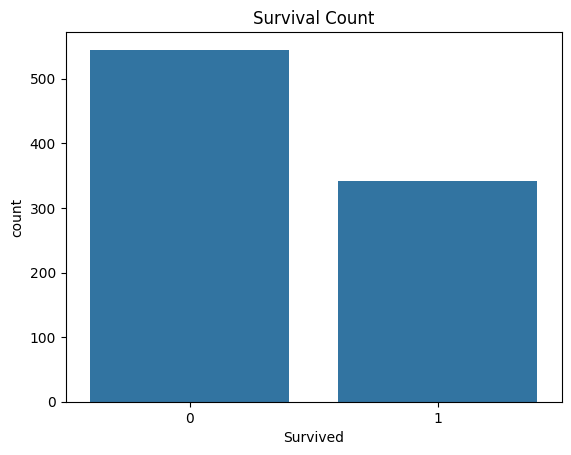

In [40]:
# Distribution of 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

Text(0.5, 1.0, 'Survival Rate by Gender')

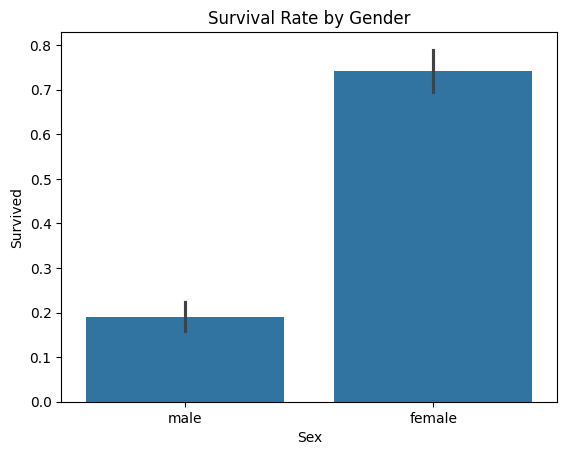

In [41]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

Text(0.5, 1.0, 'Survival Rate by Class')

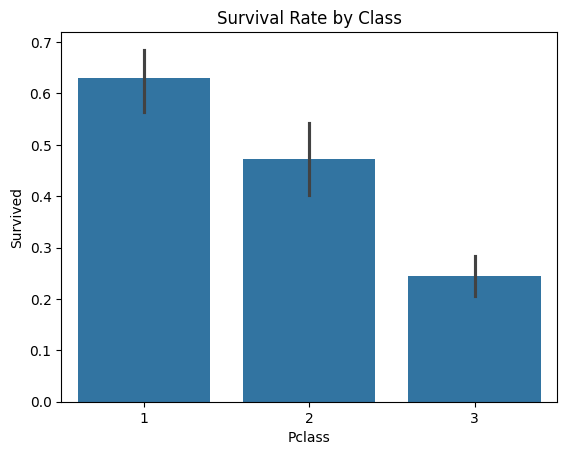

In [42]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')

Text(0.5, 1.0, 'Age Distribution')

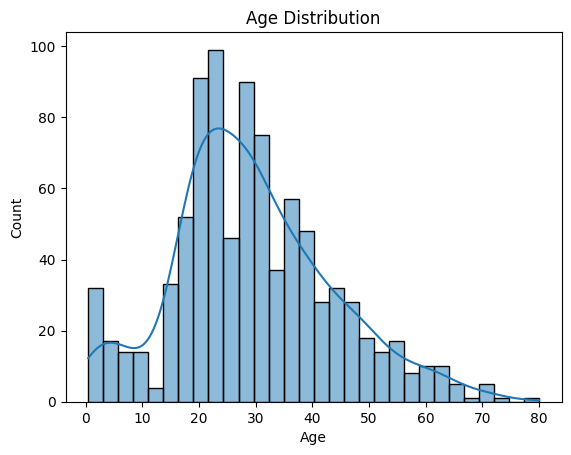

In [43]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

<ipython-input-44-e7e00922f996>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
<ipython-input-44-e7e00922f996>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


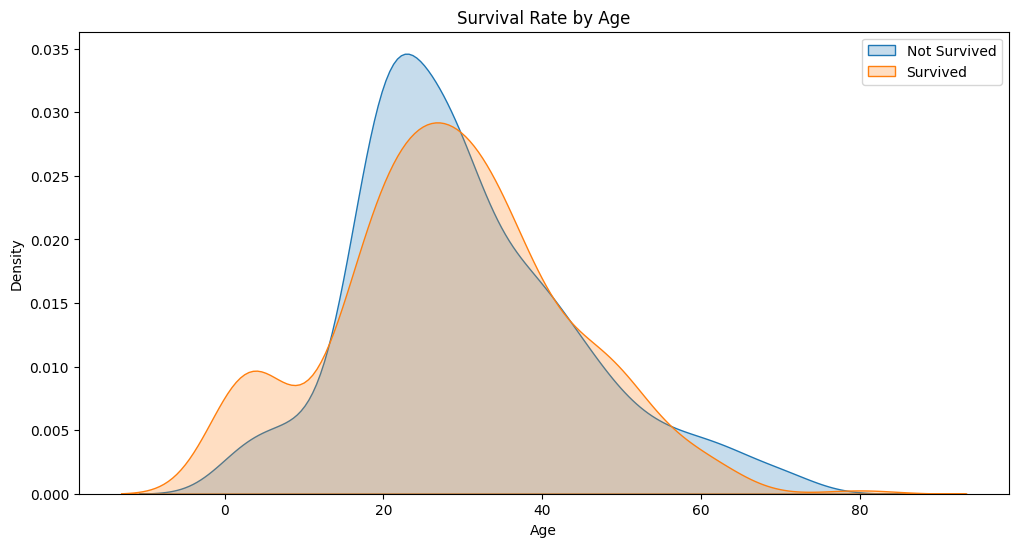

In [44]:
# Survival rate by age
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

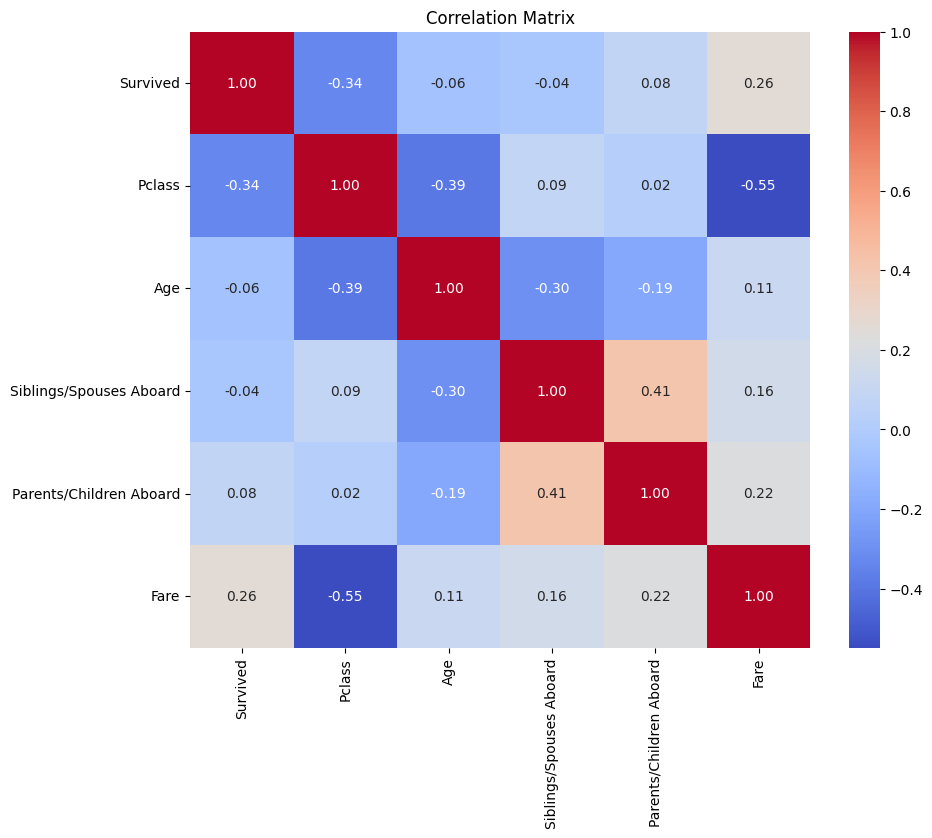

In [45]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

 Feature Engineering

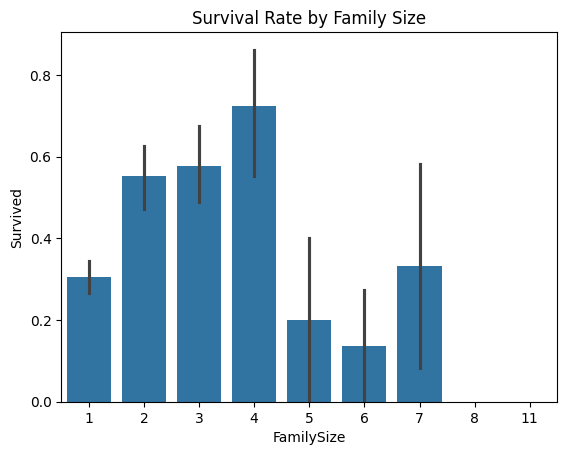

In [46]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

# Survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

Data Visualization

Text(0.5, 1.0, 'Pairplot of Numerical Features')

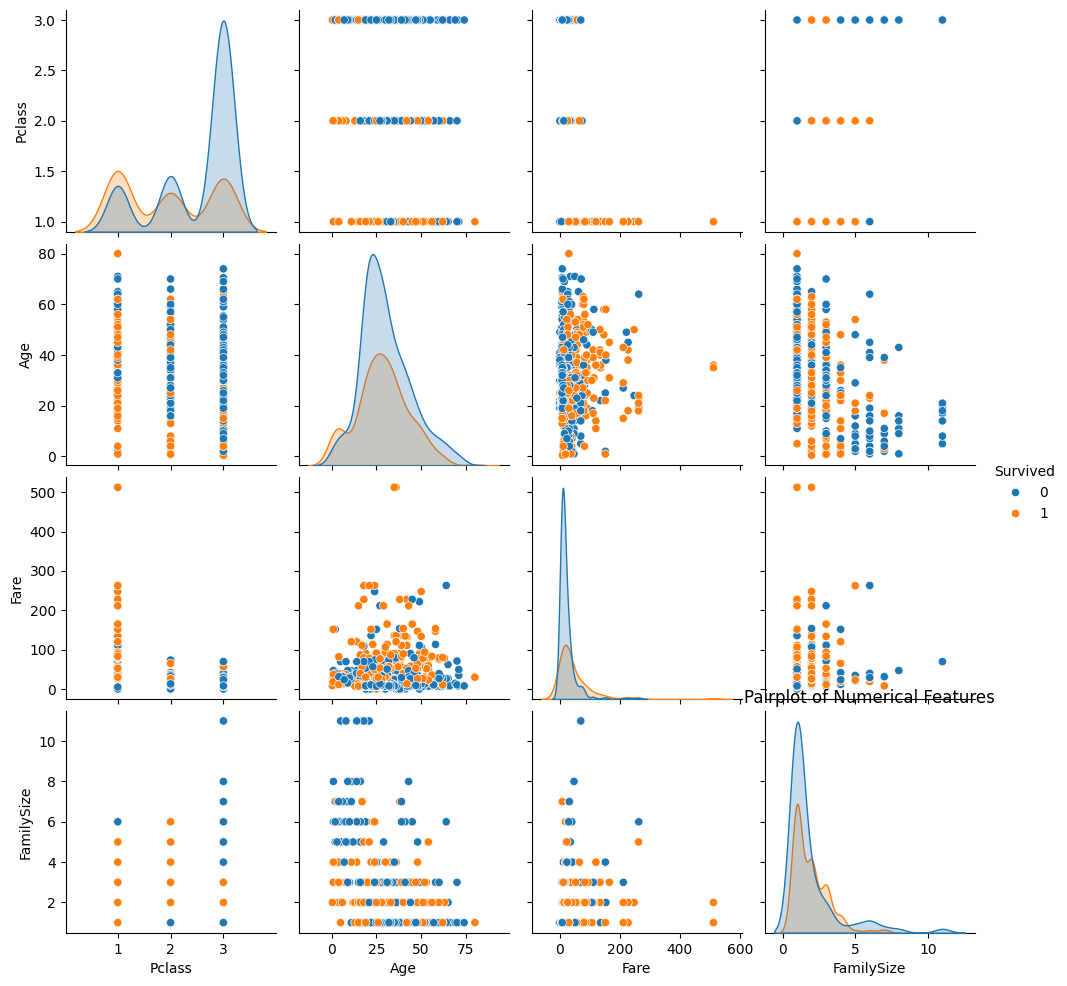

In [47]:
# Pairplot for numerical features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.title('Pairplot of Numerical Features')

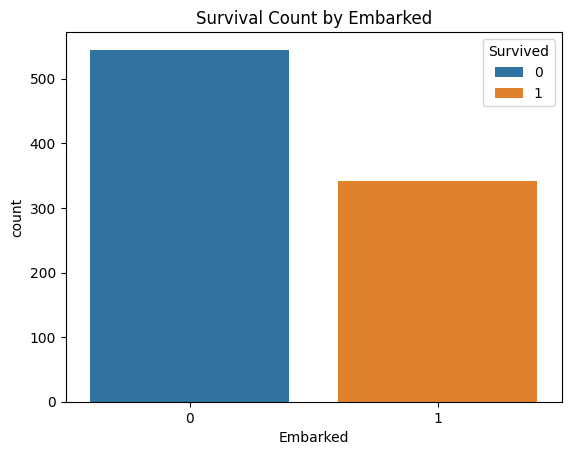

In [48]:
# Create 'Embarked' column representing total passengers
df['Embarked'] = df['Survived']

# Countplot of Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()